In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [18]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

# Generate lambda sequence:
- fit on orginal data set (b/f) bootstrapping to get lambda sequence (100 lambdas) 
- use this sequence of lambdas for bootstrapping

In [5]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [6]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [7]:
ls()
dim(cardioAICS)

[1] "base_dir"      "cardioAICS"    "cell_metadata"

[1] 22187 14573

In [8]:
cardioAICS <- t(cardioAICS)

In [9]:
diff_day <- cell_metadata$day
diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X

diff_day <- as.factor(diff_day)

# get lambda sequence to use in all bootstraps
fit <- glmnet(cardioAICS, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq1 <- fit$lambda

### Lambda sequence for early late small molecule

In [10]:
small_mol <- cell_metadata$protocol == "Lian"
exp_mat <- cardioAICS[small_mol,]

diff_day <- cell_metadata$day[small_mol]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[small_mol]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq2 <- fit$lambda

### Lambda sequence for early late cytokine

In [11]:
cytokine <- cell_metadata$protocol == "Murry"
exp_mat <- cardioAICS[cytokine,]

diff_day <- cell_metadata$day[cytokine]

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X[cytokine]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq3 <- fit$lambda

### Lambda sequence for early (cytokine and small molecule)

In [12]:
early_cells <- cell_metadata$day %in% c("D12", "D14")
exp_mat <- cardioAICS[early_cells,]

diff_day <- cell_metadata$day[early_cells]

names(diff_day) <- cell_metadata$X[early_cells]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq4 <- fit$lambda

### Lambda sequence for late (cytokine and small molecule)

In [13]:
late_cells <- cell_metadata$day %in% c("D24", "D26")
exp_mat <- cardioAICS[late_cells,]

diff_day <- cell_metadata$day[late_cells]

names(diff_day) <- cell_metadata$X[late_cells]

diff_day <- as.factor(diff_day)

fit <- glmnet(exp_mat, diff_day, family = "binomial", nlambda = 100, alpha = 0.5)
lambda_seq5 <- fit$lambda

### Lambda sequence
- create one lambda sequence to use for all (evenly spaced on log scale from min to max of union of all lambda sequences)

In [14]:
all_lambda <- union(union(union(lambda_seq1, lambda_seq2), union(lambda_seq3, lambda_seq4)), lambda_seq5)

In [19]:
lambda_seq <- exp(seq(log(max(all_lambda)), log(min(all_lambda)), length.out = 100))
lambda_seq
save(lambda_seq, file = paste0(base_dir, "all_lambda_seq_log.RData"))

[1] 0.563011961 0.535036616 0.508451329 0.483187032 0.459178086 0.436362113
  [7] 0.414679837 0.394074926 0.374493846 0.355885725 0.338202218 0.321397381
 [13] 0.305427556 0.290251251 0.275829037 0.262123444 0.249098865 0.236721461
 [19] 0.224959074 0.213781145 0.203158633 0.193063940 0.183470839 0.174354407
 [25] 0.165690960 0.157457987 0.149634101 0.142198974 0.135133288 0.128418688
 [31] 0.122037727 0.115973828 0.110211237 0.104734981 0.099530834 0.094585274
 [37] 0.089885452 0.085419159 0.081174790 0.077141319 0.073308265 0.069665671
 [43] 0.066204073 0.062914477 0.059788337 0.056817531 0.053994340 0.051311430
 [49] 0.048761831 0.046338918 0.044036396 0.041848284 0.039768896 0.037792830
 [55] 0.035914953 0.034130385 0.032434490 0.030822861 0.029291313 0.027835865
 [61] 0.026452736 0.025138334 0.023889242 0.022702216 0.021574172 0.020502179
 [67] 0.019483452 0.018515344 0.017595340 0.016721050 0.015890202 0.015100639
 [73] 0.014350307 0.013637259 0.012959641 0.012315693 0.011703742 0.011122198
 [79] 0.010569550 0.010044362 0.009545271 0.009070979 0.008620253 0.008191924
 [85] 0.007784878 0.007398057 0.007030457 0.006681123 0.006349146 0.006033665
 [91] 0.005733860 0.005448952 0.005178200 0.004920902 0.004676389 0.004444025
 [97] 0.004223207 0.004013361 0.003813943 0.003624433

# Make list of early vs. late genes

In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "early_late.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [7]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [8]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [9]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [10]:
genes <- genes[2:length(genes)]

In [11]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [12]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [13]:
print(length(genes_intersect))
genes_intersect

[1] 77


[1] "MAN1C1_HUMAN"        "ACTA1_HUMAN"         "MYH6_HUMAN"         
 [4] "PTPRD_HUMAN"         "INPP4B_HUMAN"        "COL2A1_HUMAN"       
 [7] "ADAMTS12_HUMAN"      "CCDC141_HUMAN"       "PDLIM3_HUMAN"       
[10] "FAM189A2_HUMAN"      "FHOD3_HUMAN"         "GRIN2A_HUMAN"       
[13] "MYL4_HUMAN"          "GOLIM4_HUMAN"        "TNS1_HUMAN"         
[16] "NAV1_HUMAN"          "PRTG_HUMAN"          "PLN_HUMAN"          
[19] "VCAN_HUMAN"          "MYO1D_HUMAN"         "CNTN5_HUMAN"        
[22] "PPP2R3A_HUMAN"       "BMPER_HUMAN"         "KCNH7_HUMAN"        
[25] "KCNQ5_HUMAN"         "FAM19A4_HUMAN"       "ARHGAP42_HUMAN"     
[28] "GPC3_HUMAN"          "WWOX_HUMAN"          "SAMD4A_HUMAN"       
[31] "ANKRD1_HUMAN"        "ATP13A3_HUMAN"       "STK39_HUMAN"        
[34] "KDR_HUMAN"           "RBMS3_HUMAN"         "LSAMP_HUMAN"        
[37] "TANC2_HUMAN"         "FRMD4B_HUMAN"        "MYH7_HUMAN"         
[40] "EGFEM1P_HUMAN"       "FBXL7_HUMAN"         "GJA3_HUMAN"         
[43] "BMP2_HUMAN"          "PAM_HUMAN"           "PDGFD_HUMAN"        
[46] "SORCS3_HUMAN"        "RNF150_HUMAN"        "DYSF_HUMAN"         
[49] "NAP1L1_HUMAN"        "ADAM28_HUMAN"        "NT5C2_HUMAN"        
[52] "MEF2C_HUMAN"         "ST6GAL1_HUMAN"       "DYNC1H1_HUMAN"      
[55] "H19_HUMAN"           "HAPLN1_HUMAN"        "FLRT2_HUMAN"        
[58] "LINC00881_HUMAN"     "PIP4K2A_HUMAN"       "RXRG_HUMAN"         
[61] "C20orf166-AS1_HUMAN" "FLNA_HUMAN"          "EPB41L4A_HUMAN"     
[64] "FTL_HUMAN"           "MOXD1_HUMAN"         "SV2C_HUMAN"         
[67] "RPS6_HUMAN"          "FSHR_HUMAN"          "PRSS35_HUMAN"       
[70] "ITPKB_HUMAN"         "MDK_HUMAN"           "PLCL1_HUMAN"        
[73] "DOK4_HUMAN"          "KIF1A_HUMAN"         "NPNT_HUMAN"         
[76] "UCHL1_HUMAN"         "LIN28A_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


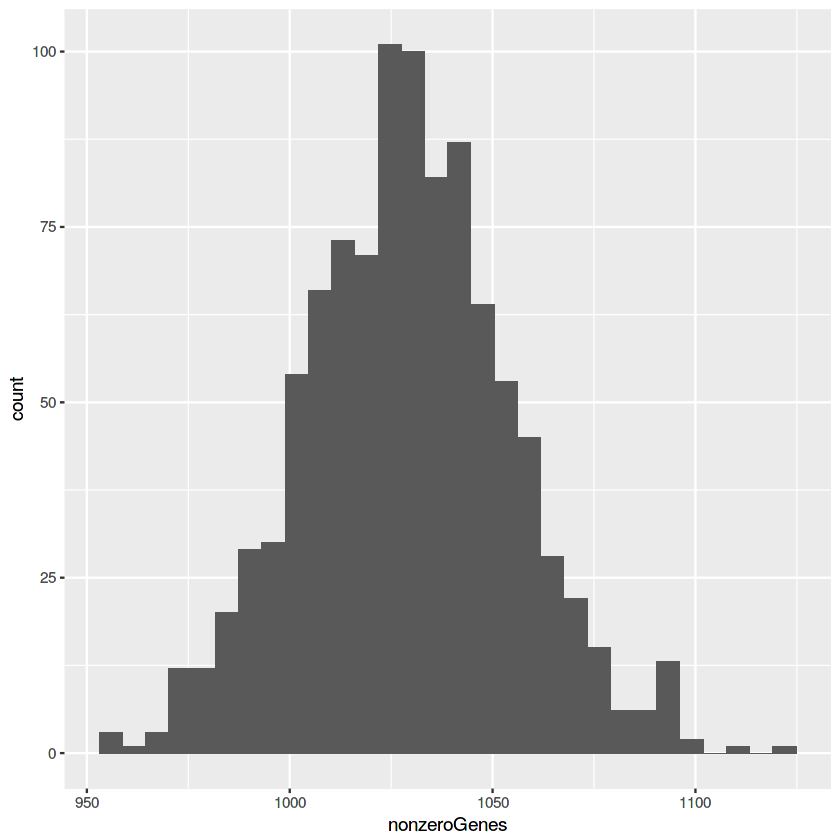

In [14]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [15]:
remove_1st2exp_genes <- c('MAN1C1_HUMAN','FBN2_HUMAN','CACNA1C_HUMAN','MYH6_HUMAN','ATXN1_HUMAN','RYR2_HUMAN','PTPRD_HUMAN','INPP4B_HUMAN','COL2A1_HUMAN','CORIN_HUMAN','CCDC141_HUMAN','ROBO2_HUMAN','FAM189A2_HUMAN','FHOD3_HUMAN','GRIN2A_HUMAN','MYL4_HUMAN','GOLIM4_HUMAN','TNS1_HUMAN','NAV1_HUMAN','PRTG_HUMAN','PLN_HUMAN','VCAN_HUMAN','MYO1D_HUMAN','CNTN5_HUMAN','COLEC12_HUMAN','PRICKLE1_HUMAN','SEMA3C_HUMAN','BMPER_HUMAN','KCNH7_HUMAN','TPM1_HUMAN','FAM19A4_HUMAN','ARHGAP42_HUMAN','GPC3_HUMAN','WWOX_HUMAN','SAMD4A_HUMAN','ANKRD1_HUMAN','ATP13A3_HUMAN','GNAS_HUMAN','LSAMP_HUMAN','TANC2_HUMAN','MYH7_HUMAN','SEMA5A_HUMAN','FBXL7_HUMAN','BMP2_HUMAN','PAM_HUMAN','SORCS3_HUMAN','RNF150_HUMAN','ADAM28_HUMAN','SNAP91_HUMAN','SDK1_HUMAN','MEF2C_HUMAN','H19_HUMAN','DENND5B_HUMAN','RBFOX2_HUMAN','UBE2D2_HUMAN','FLRT2_HUMAN','LINC00881_HUMAN','EZR_HUMAN','RXRG_HUMAN','TAGLN_HUMAN','RYR1_HUMAN','MOXD1_HUMAN','SV2C_HUMAN','FKBP5_HUMAN','SCUBE3_HUMAN','CKM_HUMAN','PRSS35_HUMAN','QRFPR_HUMAN','HECW2_HUMAN','CPNE4_HUMAN','DOK4_HUMAN','KIF1A_HUMAN','CCND1_HUMAN','COL13A1_HUMAN','OTOGL_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "MAN1C1_HUMAN"    "MYH6_HUMAN"      "PTPRD_HUMAN"     "INPP4B_HUMAN"   
 [5] "COL2A1_HUMAN"    "CCDC141_HUMAN"   "FAM189A2_HUMAN"  "FHOD3_HUMAN"    
 [9] "GRIN2A_HUMAN"    "MYL4_HUMAN"      "GOLIM4_HUMAN"    "TNS1_HUMAN"     
[13] "NAV1_HUMAN"      "PRTG_HUMAN"      "PLN_HUMAN"       "VCAN_HUMAN"     
[17] "MYO1D_HUMAN"     "CNTN5_HUMAN"     "BMPER_HUMAN"     "KCNH7_HUMAN"    
[21] "FAM19A4_HUMAN"   "ARHGAP42_HUMAN"  "GPC3_HUMAN"      "WWOX_HUMAN"     
[25] "SAMD4A_HUMAN"    "ANKRD1_HUMAN"    "ATP13A3_HUMAN"   "LSAMP_HUMAN"    
[29] "TANC2_HUMAN"     "MYH7_HUMAN"      "FBXL7_HUMAN"     "BMP2_HUMAN"     
[33] "PAM_HUMAN"       "SORCS3_HUMAN"    "RNF150_HUMAN"    "ADAM28_HUMAN"   
[37] "MEF2C_HUMAN"     "H19_HUMAN"       "FLRT2_HUMAN"     "LINC00881_HUMAN"
[41] "RXRG_HUMAN"      "MOXD1_HUMAN"     "SV2C_HUMAN"      "PRSS35_HUMAN"   
[45] "DOK4_HUMAN"      "KIF1A_HUMAN"

[1] 46

46 genes are found in both (all cell analysis including non-cardios vs. remove1st2exp w/ TNNT2 == 0 cells filtered out)

### Caclulate fold changes for genes

In [16]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [17]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [18]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [20]:
cardioAICS <- t(cardioAICS)

diff_day <- cell_metadata$day

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- cell_metadata$X

In [21]:
genes.use <- genes_intersect

late_cells <- cell_metadata$X[cell_metadata$day %in% c("D24", "D26")]
early_cells <- cell_metadata$X[cell_metadata$day %in% c("D12", "D14")]

early_exp_mat <- cardioAICS[early_cells,]
late_exp_mat <- cardioAICS[late_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    early_exp <- early_exp_mat[,gene]
    late_exp <- late_exp_mat[,gene]
    log2fc <- log2(mean(expm1(early_exp)) + 1) - log2(mean(expm1(late_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [22]:
lfc_df

log2fc,gene
-2.1954680,MYH7_HUMAN
-1.7785094,CNTN5_HUMAN
-1.4379214,INPP4B_HUMAN
-1.1394393,FBXL7_HUMAN
-1.0612696,PLN_HUMAN
-0.9382398,NAV1_HUMAN
-0.9373440,PRSS35_HUMAN
-0.8722851,H19_HUMAN
-0.8600589,PDGFD_HUMAN
-0.8316667,SV2C_HUMAN


### Fit using 75 genes

In [23]:
diff_day <- as.factor(diff_day)

In [25]:
library(boot)

In [26]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [29]:
fit <- glm(diff_day ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [30]:
fit


Call:  glm(formula = diff_day ~ ., family = binomial("logit"), data = subset_cardio)

Coefficients:
          (Intercept)           MAN1C1_HUMAN            ACTA1_HUMAN  
               1.9234                 0.3235                -0.8274  
           MYH6_HUMAN            PTPRD_HUMAN           INPP4B_HUMAN  
              -0.3458                -0.3421                 0.5167  
         COL2A1_HUMAN         ADAMTS12_HUMAN          CCDC141_HUMAN  
              -0.2748                -0.2417                -0.2403  
         PDLIM3_HUMAN         FAM189A2_HUMAN            FHOD3_HUMAN  
               0.3838                -0.2203                 0.3629  
         GRIN2A_HUMAN             MYL4_HUMAN           GOLIM4_HUMAN  
              -0.5534                -0.4891                 0.3233  
           TNS1_HUMAN             NAV1_HUMAN             PRTG_HUMAN  
               0.4377                 0.4296                -0.3502  
            PLN_HUMAN             VCAN_HUMAN            MYO

In [31]:
subset_cardio$diff_day <- diff_day

In [32]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [33]:
cv.test$delta

[1] 0.04275029 0.04239344

In [34]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [35]:
holdout_cardioAICS <- t(holdout_cardioAICS)

diff_day <- holdout_cell_metadata$day

diff_day <- gsub('D12|D14', "early", diff_day)
diff_day <- gsub('D24|D26', "late", diff_day)
names(diff_day) <- holdout_cell_metadata$X

In [37]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [39]:
dim(holdout_mat)

[1] 1642   77

In [40]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [43]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("early")
    } else {
        return("late")
    }
}

In [44]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [46]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_day)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted early late
    early  1079   48
    late     24  491